### Gradient Descent Doubts ? 

#### Models from SKLearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

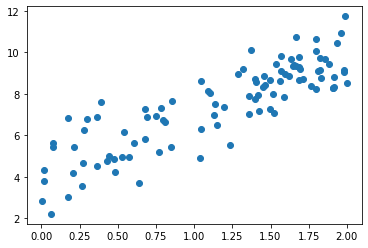

In [3]:
plt.scatter(X, y)
plt.show()

    np.c_[a, b] # col stack
    np.r_[a, b] # row stack

In [4]:

X_b = np.column_stack([np.ones((100, 1)), X])
m = X_b.shape[0]

In [5]:
theta = np.random.randn(2, 1)

In [6]:
def predict(X):
    return X.dot(theta)

In [7]:
y_hat = predict(X_b)

In [8]:
from sklearn.metrics import mean_squared_error as mse
mse(y, y_hat)

33.17860288825299

In [9]:
theta

array([[1.30802576],
       [0.57699265]])

In [10]:
eta = 0.10
n_iterations = 1000
gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
theta = theta - eta*gradients

In [11]:
y_hat = predict(X_b)
mse(y, y_hat)

8.667047192885432

In [12]:
for it in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    y_hat = predict(X_b)
    if it % 100 == 0:
        print(mse(y, y_hat))

2.929243023554518
1.0651443525977569
1.0648125628257052
1.0648116026315992
1.0648115998528132
1.0648115998447718
1.0648115998447485
1.064811599844748
1.0648115998447485
1.0648115998447485


In [13]:
theta

array([[4.15664556],
       [2.85084363]])

In [14]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
import seaborn as sns

In [16]:
mpg = sns.load_dataset('mpg').dropna()

In [17]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [18]:
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]

    Transformers -> preprocess according to ML Model -> fit, transform, fit_transform
    Models -> used Train machine -> fit, predict

In [19]:
# Transformer Class
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None
    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        return self
    def transform(self, X):
        return (X-self.mean)/self.std
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    def __repr__(self):
        return "StandardScaler()"
        

In [20]:
scaler = StandardScaler()

In [21]:
X = mpg[features].to_numpy()
X_tr = scaler.fit_transform(X)

In [22]:
y = mpg['mpg'].to_numpy()

In [23]:
X[:5]

array([[   8. ,  307. ,  130. , 3504. ,   12. ],
       [   8. ,  350. ,  165. , 3693. ,   11.5],
       [   8. ,  318. ,  150. , 3436. ,   11. ],
       [   8. ,  304. ,  150. , 3433. ,   12. ],
       [   8. ,  302. ,  140. , 3449. ,   10.5]])

In [24]:
X_tr[:5]

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       [ 1.48394702,  1.04858429,  1.18439658,  0.53684535, -1.285258  ],
       [ 1.48394702,  1.02944745,  0.92426466,  0.5557062 , -1.82965485]])

$$ \hat y = b + wX$$

features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]

$$\hat {\text {mpg}} = \theta_0 + \theta_1 \text {cylinders} + \theta_2 \text {displacement} + \theta_3 \text {horsepower} + \theta_4 \text {weight} +\theta_5 \text {acceleration}  $$

$$ \hat y = \theta_0 + \theta_1 X_1 +  \theta_2 X_2 +  \theta_3 X_3 +  \theta_4 X_4 +  \theta_5 X5$$

      X_b => (m, 6)
    theta => (6, 1)
        y => (m, 1)

  $$\nabla_{\theta_j} = \frac {2}{m} \sum\limits_{i=1}^N (\hat y_i - y_i){X^j}_i$$

In [25]:
from sklearn.linear_model import SGDRegressor

#### Batch Gradient Descent

$$\nabla_\theta = X^T (X.\theta - y)$$

In [26]:
class MySGDRegressor:
    def __init__(self, eta0=0.01, max_iter=1000, tol=0.001, early_stopping=False):
        self.eta = eta0
        self.max_iter = max_iter
        self.matrix = []
    def fit(self, X, y):
        self.theta = np.random.randn(X.shape[1]+1, 1)
        # step-1: initlize weights and biases randomly
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # adding one extra feature for bias term having value 1
        y = y.reshape(-1, 1)
        # reshaping y just to make dimensions dot product familer
        self.matrix.append(self.theta)
        for _ in range(self.max_iter):
            # step2: calculate gradient of weights and biases
            gradients = (2/X_b.shape[0])*(X_b.T.dot((X_b.dot(self.theta)-y)))
            # step3: update weights and biases by subracting (decent) gradients
            # w_next = w - eta * gradient(w)
            self.theta = self.theta - (self.eta*gradients)
            self.matrix.append(self.theta)
            #if _ % 100 == 0:
            #    err = mse(y, X_b.dot(self.theta))
            #    print(err)
        self.coef_ = self.theta[1:,].flatten()
        self.intercept_ = self.theta[0]
    def predict(self, X):
        # we predict with new_X values
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta).flatten()

In [27]:
model = MySGDRegressor()
model.fit(X_tr, y)

In [28]:
y_hat = model.predict(X_tr)

In [29]:
y[:5]

array([18., 15., 18., 16., 17.])

In [30]:
y_hat[:5]

array([18.60759448, 15.85169448, 17.93523283, 17.88872013, 18.47644204])

In [31]:
from sklearn.metrics import mean_squared_error as mse

In [32]:
error = mse(y, y_hat)
print(error)

17.78511166493632


In [33]:
my_model = MySGDRegressor()
model = SGDRegressor()

In [34]:
my_model.fit(X_tr, y)
model.fit(X_tr, y)

SGDRegressor()

In [35]:
my_model.intercept_

array([23.44591832])

In [36]:
model.intercept_

array([23.43214302])

In [37]:
my_model.coef_

array([-0.15401634, -1.5127758 , -1.86024521, -3.40448931, -0.31350217])

In [38]:
model.coef_

array([-0.54189449, -0.62591419, -1.81666284, -3.82030984, -0.22923712])

In [39]:
y_1 = my_model.predict(X_tr)
y_2 = model.predict(X_tr)

In [40]:
print("My Model Error: ", mse(y, y_1))
print("Sklearn Model Error: ", mse(y, y_2))

My Model Error:  17.909860330640274
Sklearn Model Error:  17.806602430298774


In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y, y_1)

0.705249289453227

In [43]:
r2_score(y, y_2)

0.7069486516444081

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
m = LinearRegression()
m.fit(X_tr, y)
yt = m.predict(X_tr)
r2_score(y, yt)

0.7076926326770516

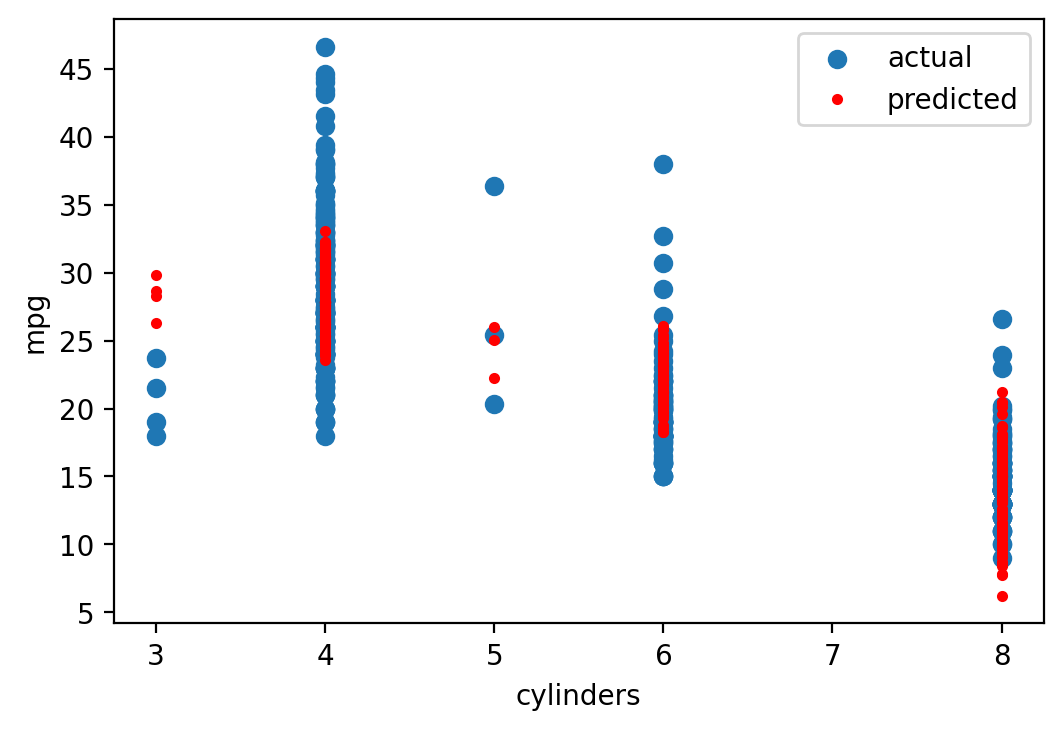

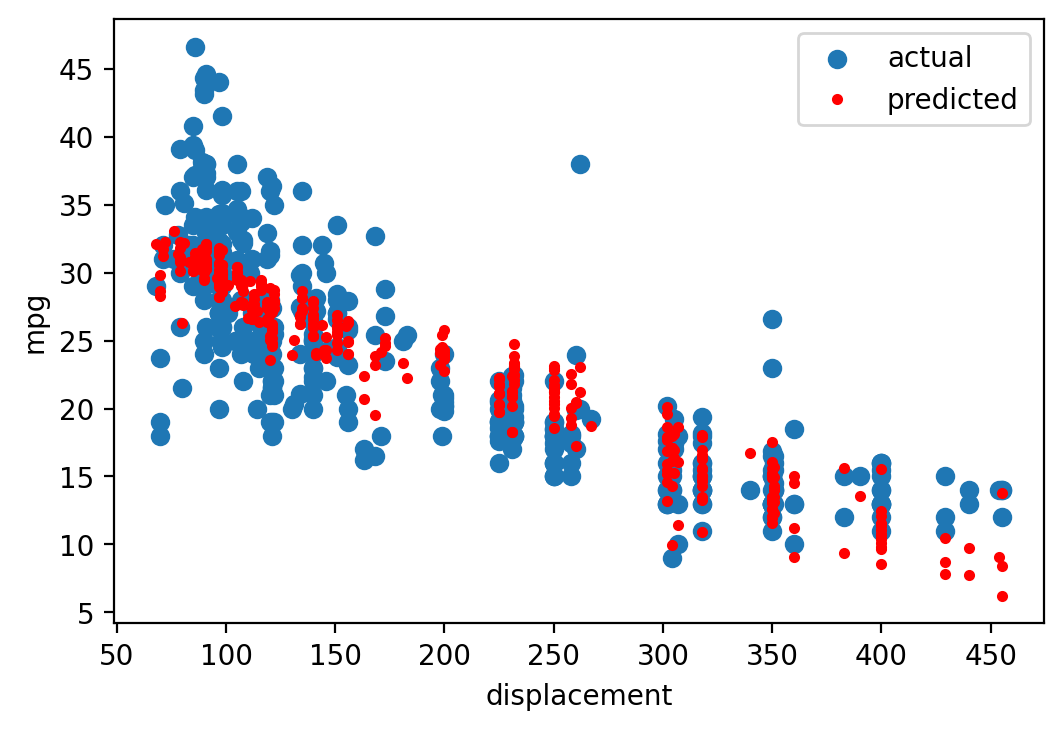

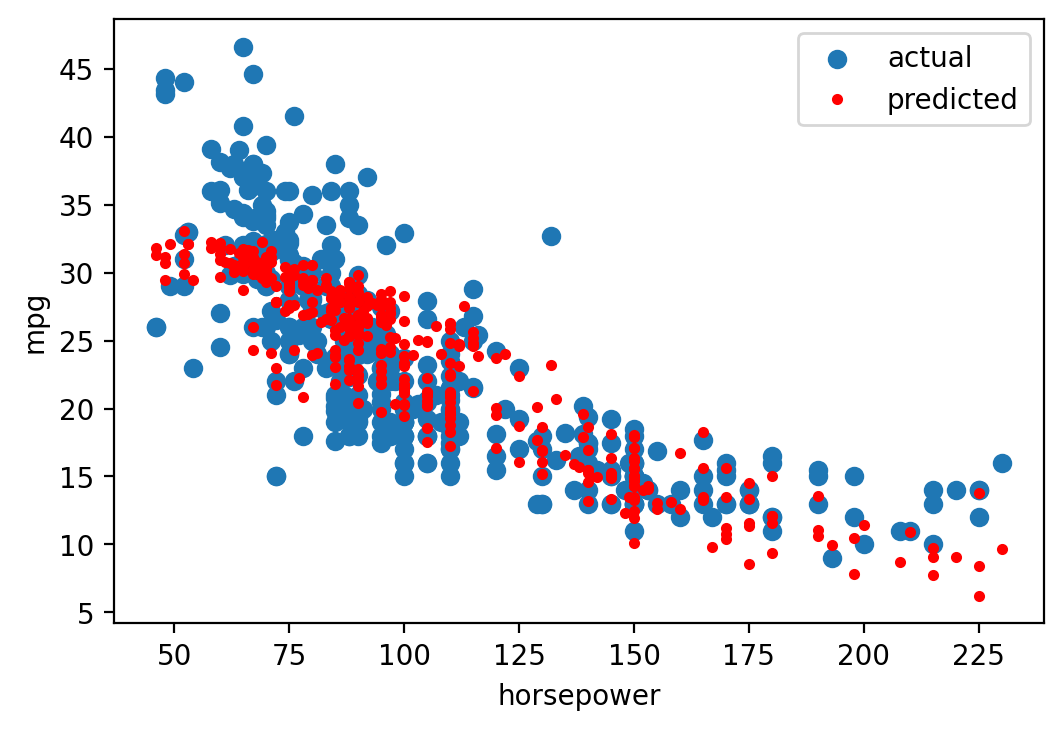

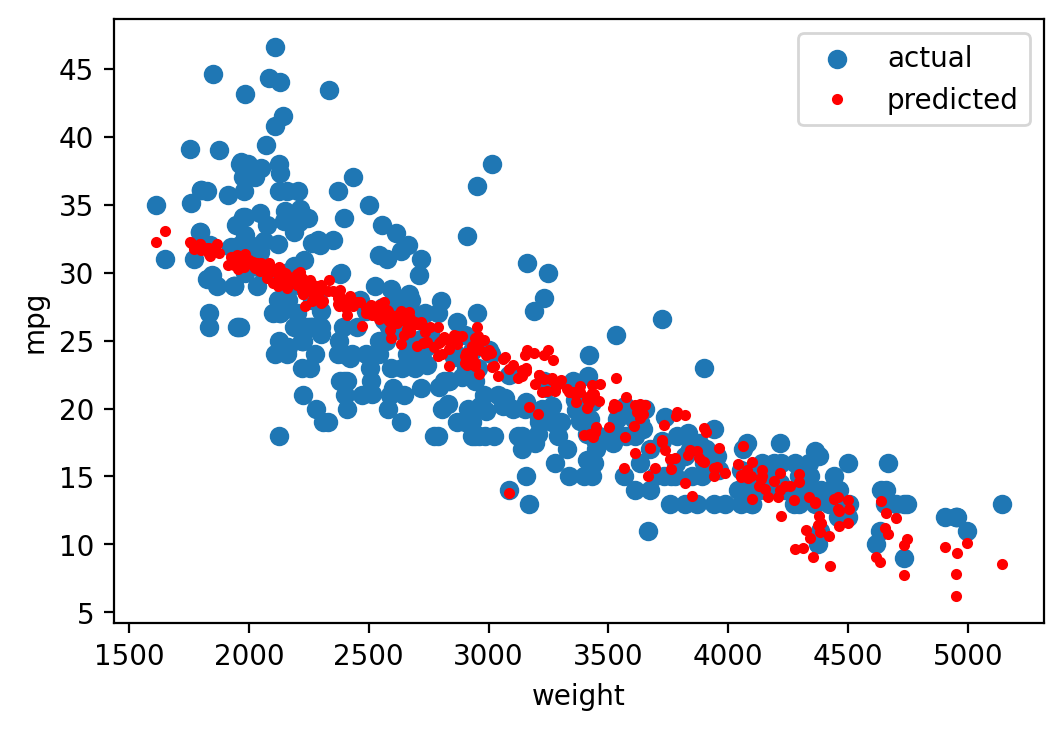

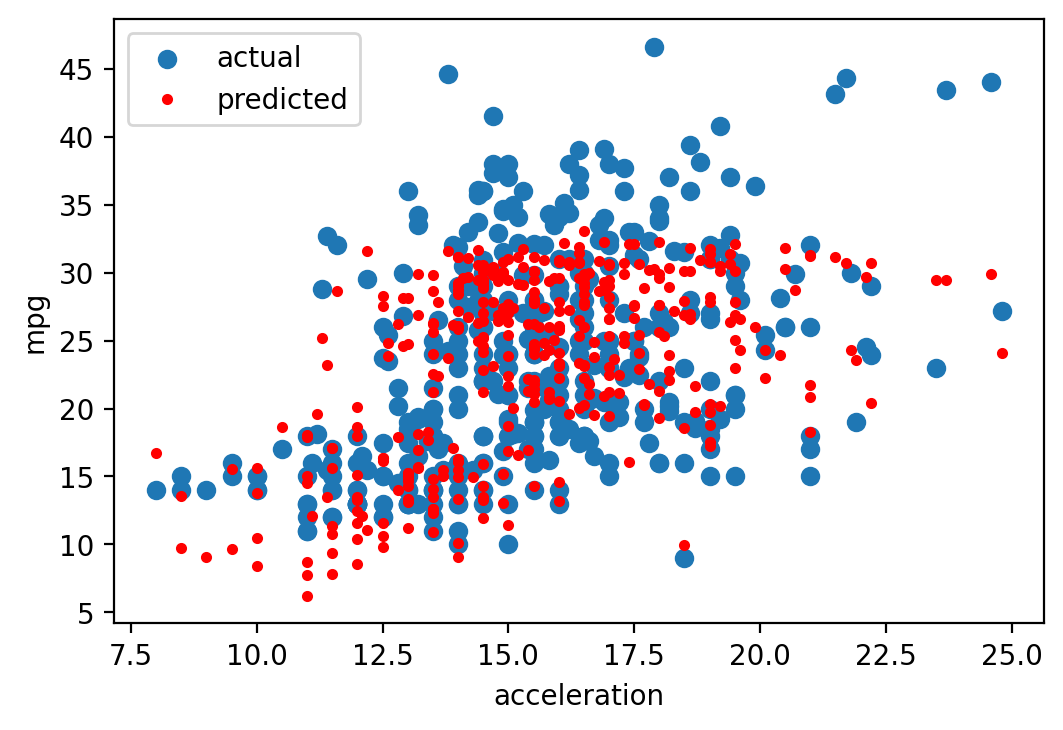

In [46]:
y_hat = my_model.predict(X_tr)
for col in features:
    plt.figure(dpi=200)
    plt.scatter(mpg[col], y,label='actual')
    plt.xlabel(col)
    plt.ylabel("mpg")
    plt.plot(mpg[col], y_hat, 'r.', label='predicted')
    plt.legend()
    plt.show()

In [ ]:
ri = np.arange(0, X.shape[0])
ix = np.random.choice(ri)

In [ ]:
X_b[ix:ix+1].T.dot(yb[ix:ix+1])

In [ ]:
yb[ix]

In [ ]:
X_b[ix]

### Stochastic Gradient Descent 

In [ ]:
lst = [1, 2, 3, 4]

ix = 2
lst[ix:ix+1]

In [48]:
class MySGDRegressor:
    def __init__(self, eta0=0.01, max_iter=1000, tol=0.001, early_stopping=False):
        self.eta = eta0
        self.max_iter = max_iter
        self.matrix = []
    def fit(self, X, y):
        self.theta = np.random.randn(X.shape[1]+1, 1)
        # step-1: initlize weights and biases randomly
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # adding one extra feature for bias term having value 1
        y = y.reshape(-1, 1)
        # reshaping y just to make dimensions dot product familer
        self.matrix.append(self.theta)
        ri = np.arange(0, X_b.shape[0])
        np.random.shuffle(ri)
        for _ in range(self.max_iter):
            # step2: calculate gradient of weights and biases
            np.random.shuffle(ri)
            ix = np.random.choice(ri)
            gradients = (X_b[ix:ix+1].T.dot((X_b[ix:ix+1].dot(self.theta)-y[ix:ix+1])))
            # step3: update weights and biases by subracting (decent) gradients
            # w_next = w - eta * gradient(w)
            self.theta = self.theta - (self.eta*gradients)
            self.matrix.append(self.theta)
            #if _ % 100 == 0:
            #    err = mse(y, X_b.dot(self.theta))
            #    print(err)
        self.coef_ = self.theta[1:,].flatten()
        self.intercept_ = self.theta[0]
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta).flatten()

In [49]:
model = MySGDRegressor()

In [50]:
model.fit(X_tr, y)

In [51]:
model.coef_

array([-0.20454116, -1.09844768, -1.37071761, -3.42489872, -0.39536899])

In [52]:
model.intercept_

array([22.89490039])

In [53]:
from sklearn.linear_model import SGDRegressor
m = SGDRegressor()
m.fit(X_tr, y)
m.coef_

array([-0.61691789, -0.88533117, -1.89134692, -3.55890504, -0.25598443])

In [54]:
m.intercept_

array([23.46605074])

In [55]:
model = MySGDRegressor(max_iter=100000)

In [56]:
model.fit(X_tr, y)

In [57]:
y_hat = model.predict(X_tr)
print(r2_score(y, y_hat))

0.6943287876876311


In [58]:
model.coef_

array([-0.45054014,  0.16267526, -1.8299887 , -4.60524821,  0.59053054])

In [59]:
model.intercept_

array([24.09188178])

In [60]:
class MiniSGDRegressor:
    def __init__(self, eta0=0.01, max_iter=1000, tol=0.001, early_stopping=False):
        self.eta = eta0
        self.max_iter = max_iter
        self.matrix = []
    def fit(self, X, y):
        ms = int(X.shape[0]*0.1) # 400*0.1->40
        self.theta = np.random.randn(X.shape[1]+1, 1)
        # step-1: initlize weights and biases randomly
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # adding one extra feature for bias term having value 1
        y = y.reshape(-1, 1)
        # reshaping y just to make dimensions dot product familer
        self.matrix.append(self.theta)
        ri = np.arange(0, X_b.shape[0])
        np.random.shuffle(ri)
        for _ in range(self.max_iter):
            # step2: calculate gradient of weights and biases
            np.random.shuffle(ri)
            ix = ri[:ms]
            gradients = (X_b[ix].T.dot((X_b[ix].dot(self.theta)-y[ix])))
            # step3: update weights and biases by subracting (decent) gradients
            # w_next = w - eta * gradient(w)
            self.theta = self.theta - (self.eta*gradients)
            self.matrix.append(self.theta)
            #if _ % 100 == 0:
            #    err = mse(y, X_b.dot(self.theta))
            #    print(err)
        self.coef_ = self.theta[1:,].flatten()
        self.intercept_ = self.theta[0]
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta).flatten()

In [61]:
model = MiniSGDRegressor()

In [63]:
model.fit(X_tr, y)

In [64]:
model.coef_

array([-0.61083638, -0.06345042, -1.73323336, -3.91603978, -0.41678747])

In [65]:
model.intercept_

array([23.43505765])

In [66]:
print(features)

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']


In [68]:
mpg[features].head(1)

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0


In [69]:
X_new = np.array([
    [4, 200, 100, 2000, 5],
    [10, 500, 300, 2000, 20]
])

In [71]:
X_new # features 

array([[   4,  200,  100, 2000,    5],
       [  10,  500,  300, 2000,   20]])

In [74]:
X_new_tr = scaler.transform(X_new) # new data / test data

In [75]:
X_new_tr

array([[-0.86401356,  0.05346844, -0.11626304, -1.15237879, -3.82577663],
       [ 2.65792731,  2.92399494,  5.08637547, -1.15237879,  1.61819186]])

In [76]:
y_new = model.predict(X_new_tr)

In [77]:
y_new

array([30.2682439 , 16.64841366])